In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Data Collection

In [2]:
# Load data from a csv file
filename = '/Users/administrator/Desktop/CIND820 Big Data Analytics Project/datanerd-startup-venture-funding/data/investments.csv'
df = pd.read_csv(filename)
df

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,...,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,/organization/test-company-3,test company,NaN,NaN,ARE,NaN,Dubai,Dubai,/person/jamessss-bondddd,jamessss bondddd,...,NaN,NaN,/funding-round/c308019016ead7afb2a1d117018eb6fc,seed,NaN,1921-09-01,21-Sep,1921-Q3,1921,1000.0
1,/organization/andrewburnett-com-ltd,AndrewBurnett.com Ltd,|Internet|SEO|Services|Public Relations|Social...,Internet,GBR,NaN,Edinburgh,Edinburgh,/organization/ekaf,Ekaf,...,NaN,NaN,/funding-round/14fe2864e02d0f15ddc3ec8eacdc8e1b,seed,NaN,1974-01-01,Jan-74,1974-Q1,1974,NaN
2,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/antonio-murroni,ANTONIO MURRONI,...,NaN,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1979-01-01,Jan-79,1979-Q1,1979,1000000.0
3,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/filippo-murroni,FILIPPO Murroni,...,NaN,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1979-01-01,Jan-79,1979-Q1,1979,1000000.0
4,/organization/ikro,Ikro,NaN,NaN,BRA,NaN,BRA - Other,Canoas,/organization/crp-companhia-de-participacoes,CRP Companhia de Participações,...,NaN,NaN,/funding-round/46c353a8249170cc4b6ab89a522fefdc,venture,A,1982-06-01,Jun-82,1982-Q2,1982,724000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114501,/organization/helpling,Helpling,|Consumers|,Consumers,DEU,NaN,Berlin,Berlin,/person/lukasz-gadowski,Lukasz Gadowski,...,NaN,NaN,/funding-round/681af1b330a13043b17aeac45d841b88,venture,A,2014-12-02,14-Dec,2014-Q4,2014,17000000.0
114502,/organization/appknox,Appknox,|Mobile Security|SaaS|Mobile|,Mobile Security,SGP,NaN,Singapore,Singapore,/person/rajan-anandan,Rajan Anandan,...,NaN,NaN,/funding-round/bfb0b5859be2431f35882bc03370dd67,venture,NaN,2014-12-02,14-Dec,2014-Q4,2014,NaN
114503,/organization/strap,Strap,|Apps|,Apps,USA,OH,Cincinnati,Cincinnati,/person/trevor-wright,Trevor Wright,...,NaN,NaN,/funding-round/375e6c61fec5b3854ecbe5732dfdcabe,seed,NaN,2014-12-02,14-Dec,2014-Q4,2014,1200000.0
114504,/organization/strap,Strap,|Apps|,Apps,USA,OH,Cincinnati,Cincinnati,/person/wendy-lea,Wendy Lea,...,NaN,NaN,/funding-round/375e6c61fec5b3854ecbe5732dfdcabe,seed,NaN,2014-12-02,14-Dec,2014-Q4,2014,1200000.0


### Missing value

In [3]:
#check the missing values
null = df.isnull().sum()
null_cent = round(df.isnull().sum()/len(df)*100, 2)
pd.concat([null, null_cent], axis=1)

,0,1
company_permalink,0,0.00
company_name,1,0.00
company_category_list,3264,2.85
company_market,3266,2.85
company_country_code,7359,6.43
company_state_code,35348,30.87
company_region,7359,6.43
company_city,8705,7.60
investor_permalink,66,0.06
investor_name,66,0.06


In [4]:
df.shape

(114506, 24)

In [5]:
df.describe()

,funded_year,raised_amount_usd
count,114506.000000,1.011550e+05
mean,2010.686174,1.266338e+07
std,3.065592,4.724041e+07
min,1921.000000,0.000000e+00
25%,2009.000000,1.200000e+06
50%,2012.000000,4.600000e+06
75%,2013.000000,1.300000e+07
max,2014.000000,5.800000e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114506 entries, 0 to 114505
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114506 non-null  object 
 1   company_name             114505 non-null  object 
 2   company_category_list    111242 non-null  object 
 3   company_market           111240 non-null  object 
 4   company_country_code     107147 non-null  object 
 5   company_state_code       79158 non-null   object 
 6   company_region           107147 non-null  object 
 7   company_city             105801 non-null  object 
 8   investor_permalink       114440 non-null  object 
 9   investor_name            114440 non-null  object 
 10  investor_category_list   30507 non-null   object 
 11  investor_market          30455 non-null   object 
 12  investor_country_code    86521 non-null   object 
 13  investor_state_code      62274 non-null   object 
 14  inve

In [7]:
df.duplicated().sum()

0

In [8]:
# removing features

# dropping company_state_code, investor_state_code, investor_category_list, investor_market and funding_round_code
# as they have more than 30% null values

# dropping features like funded_at, founded_at, funded_month, funded_quarter, 
#    funding_round_permalink as these are not relevant features

df = df.drop(['investor_category_list','investor_market','funded_at', 'company_state_code',
              'investor_state_code','funding_round_code','funded_month','funded_quarter',
              'funding_round_permalink'], axis=1)


In [9]:
#replace all Nan to 0 in raised_amount_usd column
df['raised_amount_usd'] = df['raised_amount_usd'].fillna(0)

#convert column raised_amount_usd from float to int
df = df.astype({"raised_amount_usd":'int'})

In [10]:
#in million $
df['raised_amount_usd'] = df['raised_amount_usd']/1000000

### Dataset information after cleaning

In [11]:
# The info method gives the column datatypes + number of non-null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114506 entries, 0 to 114505
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company_permalink      114506 non-null  object 
 1   company_name           114505 non-null  object 
 2   company_category_list  111242 non-null  object 
 3   company_market         111240 non-null  object 
 4   company_country_code   107147 non-null  object 
 5   company_region         107147 non-null  object 
 6   company_city           105801 non-null  object 
 7   investor_permalink     114440 non-null  object 
 8   investor_name          114440 non-null  object 
 9   investor_country_code  86521 non-null   object 
 10  investor_region        86521 non-null   object 
 11  investor_city          86007 non-null   object 
 12  funding_round_type     114506 non-null  object 
 13  funded_year            114506 non-null  int64  
 14  raised_amount_usd      114506 non-nu

In [12]:
df

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_region,investor_city,funding_round_type,funded_year,raised_amount_usd
0,/organization/test-company-3,test company,NaN,NaN,ARE,Dubai,Dubai,/person/jamessss-bondddd,jamessss bondddd,NaN,NaN,NaN,seed,1921,0.001
1,/organization/andrewburnett-com-ltd,AndrewBurnett.com Ltd,|Internet|SEO|Services|Public Relations|Social...,Internet,GBR,Edinburgh,Edinburgh,/organization/ekaf,Ekaf,NaN,NaN,NaN,seed,1974,0.000
2,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX - Other,Italy,/person/antonio-murroni,ANTONIO MURRONI,NaN,NaN,NaN,seed,1979,1.000
3,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX - Other,Italy,/person/filippo-murroni,FILIPPO Murroni,NaN,NaN,NaN,seed,1979,1.000
4,/organization/ikro,Ikro,NaN,NaN,BRA,BRA - Other,Canoas,/organization/crp-companhia-de-participacoes,CRP Companhia de Participações,NaN,NaN,NaN,venture,1982,0.724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114501,/organization/helpling,Helpling,|Consumers|,Consumers,DEU,Berlin,Berlin,/person/lukasz-gadowski,Lukasz Gadowski,NaN,NaN,NaN,venture,2014,17.000
114502,/organization/appknox,Appknox,|Mobile Security|SaaS|Mobile|,Mobile Security,SGP,Singapore,Singapore,/person/rajan-anandan,Rajan Anandan,NaN,NaN,NaN,venture,2014,0.000
114503,/organization/strap,Strap,|Apps|,Apps,USA,Cincinnati,Cincinnati,/person/trevor-wright,Trevor Wright,NaN,NaN,NaN,seed,2014,1.200
114504,/organization/strap,Strap,|Apps|,Apps,USA,Cincinnati,Cincinnati,/person/wendy-lea,Wendy Lea,NaN,NaN,NaN,seed,2014,1.200


### The describe() method returns a statistical summary for each of the columns in a DataFrame. It's important to note that the descriptive statistics returned by the describe() method depends on the data type of a column. For non-numeric columns, the descriptive statistics returned by the method are as follows:

In [13]:
df.describe(include=[np.number]) 

,funded_year,raised_amount_usd
count,114506.000000,114506.000000
mean,2010.686174,11.186877
std,3.065592,44.586642
min,1921.000000,0.000000
25%,2009.000000,0.600000
50%,2012.000000,3.063800
75%,2013.000000,11.300000
max,2014.000000,5800.000000


In [14]:
df.describe(include=[np.object])

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_region,investor_city,funding_round_type
count,114506,114505,111242,111240,107147,107147,105801,114440,114440,86521,86521,86007,114506
unique,32335,32284,11874,712,101,965,2901,22276,22037,85,589,1381,13
top,/organization/fab-com,Fab,|Biotechnology|,Software,USA,SF Bay Area,San Francisco,/organization/sequoia-capital,Sequoia Capital,USA,SF Bay Area,Menlo Park,venture
freq,60,60,7762,9906,76523,32120,14287,776,776,60291,27269,9962,70615


In [15]:
#company_name
df['company_name'].value_counts()

Fab                                  60
ecomom                               59
CardioDx                             57
Practice Fusion                      55
Path                                 53
                                     ..
New Planet Technologies               1
Verifico                              1
LEAFER                                1
Mount Wachusett Community College     1
Rioglass Solar Holding                1
Name: company_name, Length: 32284, dtype: int64

In [16]:
df['company_name'].value_counts(normalize = True)

Fab                                  0.000524
ecomom                               0.000515
CardioDx                             0.000498
Practice Fusion                      0.000480
Path                                 0.000463
                                       ...   
New Planet Technologies              0.000009
Verifico                             0.000009
LEAFER                               0.000009
Mount Wachusett Community College    0.000009
Rioglass Solar Holding               0.000009
Name: company_name, Length: 32284, dtype: float64

Text(0.5, 0, 'Company name')

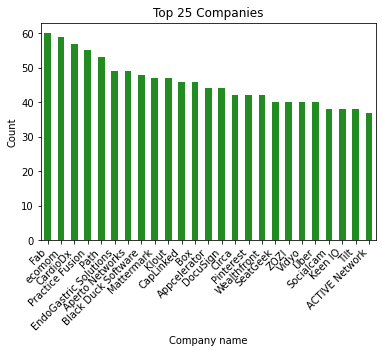

In [17]:
#Create a bar graph showing top 25 
pd.value_counts(df['company_name']).head(25).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title('Top 25 Companies')
plt.ylabel('Count')
plt.xlabel('Company name')

In [18]:
#company_category_list
df['company_category_list'].value_counts()

|Biotechnology|                                     7762
|Software|                                          7224
|Mobile|                                            2979
|Enterprise Software|                               2710
|E-Commerce|                                        2616
                                                    ... 
|Business Development|Advertising|                     1
|Design|Health and Wellness|Hardware + Software|       1
|Games|SaaS|Enterprise Software|                       1
|Mobile|Local Search|                                  1
|Home & Garden|                                        1
Name: company_category_list, Length: 11874, dtype: int64

In [19]:
df['company_category_list'].value_counts(normalize = True)

|Biotechnology|                                     0.069776
|Software|                                          0.064940
|Mobile|                                            0.026779
|Enterprise Software|                               0.024361
|E-Commerce|                                        0.023516
                                                      ...   
|Business Development|Advertising|                  0.000009
|Design|Health and Wellness|Hardware + Software|    0.000009
|Games|SaaS|Enterprise Software|                    0.000009
|Mobile|Local Search|                               0.000009
|Home & Garden|                                     0.000009
Name: company_category_list, Length: 11874, dtype: float64

Text(0.5, 0, 'Categories')

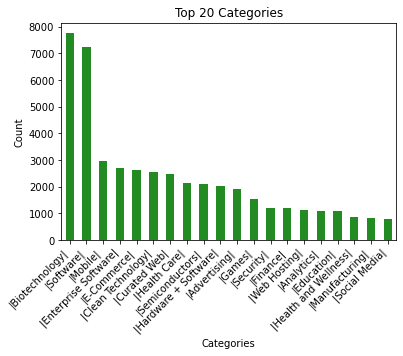

In [20]:
pd.value_counts(df['company_category_list']).head(20).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Categories')
plt.ylabel('Count')
plt.xlabel('Categories')

In [21]:
#company_market
df['company_market'].value_counts()

Software                          9906
Biotechnology                     8164
Mobile                            5282
E-Commerce                        4292
Enterprise Software               4128
                                  ... 
Self Development                     1
China Internet                       1
Video Editing                        1
Technical Continuing Education       1
CAD                                  1
Name: company_market, Length: 712, dtype: int64

In [22]:
df['company_market'].value_counts(normalize = True)

Software                          0.089051
Biotechnology                     0.073391
Mobile                            0.047483
E-Commerce                        0.038583
Enterprise Software               0.037109
                                    ...   
Self Development                  0.000009
China Internet                    0.000009
Video Editing                     0.000009
Technical Continuing Education    0.000009
CAD                               0.000009
Name: company_market, Length: 712, dtype: float64

Text(0.5, 0, "Company's market")

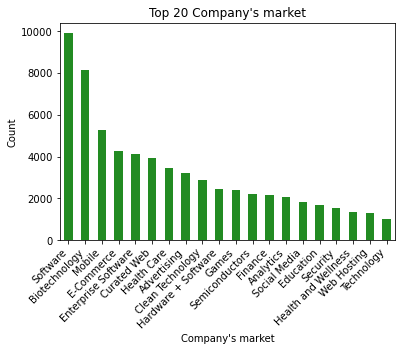

In [23]:
pd.value_counts(df['company_market']).head(20).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Company's market")
plt.ylabel('Count')
plt.xlabel("Company's market")

In [24]:
#company_country_code
df['company_country_code'].value_counts()

USA    76523
GBR     5933
CHN     2846
CAN     2667
DEU     2488
       ...  
MOZ        1
ZWE        1
NPL        1
OMN        1
MDA        1
Name: company_country_code, Length: 101, dtype: int64

In [25]:
df['company_country_code'].value_counts(normalize = True)

USA    0.714187
GBR    0.055373
CHN    0.026562
CAN    0.024891
DEU    0.023220
         ...   
MOZ    0.000009
ZWE    0.000009
NPL    0.000009
OMN    0.000009
MDA    0.000009
Name: company_country_code, Length: 101, dtype: float64

Text(0.5, 0, 'Countries')

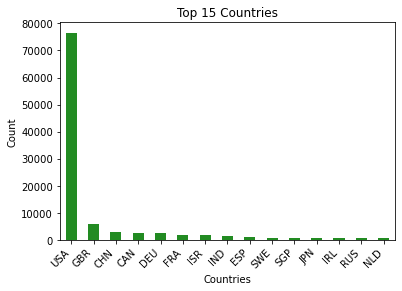

In [26]:
pd.value_counts(df['company_country_code']).head(15).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title("Top 15 Countries")
plt.ylabel('Count')
plt.xlabel("Countries")

In [27]:
#company_region
df['company_region'].value_counts()

SF Bay Area          32120
New York City         8604
Boston                6286
London                3860
Los Angeles           3674
                     ...  
Ernakulam                1
Tromso                   1
Farrington Gurney        1
GHA - Other              1
Leicestershire           1
Name: company_region, Length: 965, dtype: int64

In [28]:
df['company_region'].value_counts(normalize = True)

SF Bay Area          0.299775
New York City        0.080301
Boston               0.058667
London               0.036025
Los Angeles          0.034289
                       ...   
Ernakulam            0.000009
Tromso               0.000009
Farrington Gurney    0.000009
GHA - Other          0.000009
Leicestershire       0.000009
Name: company_region, Length: 965, dtype: float64

Text(0.5, 0, 'Company region')

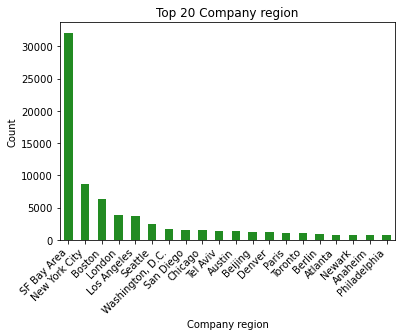

In [29]:
pd.value_counts(df['company_region']).head(20).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Company region")
plt.ylabel('Count')
plt.xlabel("Company region")

In [30]:
#company_city
df['company_city'].value_counts()

San Francisco     14287
New York           8140
London             2861
Mountain View      2601
Palo Alto          2520
                  ...  
Kyoto-shi             1
Schwarzenbruck        1
Delaware City         1
Bonneville            1
Buena Park            1
Name: company_city, Length: 2901, dtype: int64

In [31]:
df['company_city'].value_counts(normalize = True)

San Francisco     0.135037
New York          0.076937
London            0.027041
Mountain View     0.024584
Palo Alto         0.023818
                    ...   
Kyoto-shi         0.000009
Schwarzenbruck    0.000009
Delaware City     0.000009
Bonneville        0.000009
Buena Park        0.000009
Name: company_city, Length: 2901, dtype: float64

Text(0.5, 0, 'Company City')

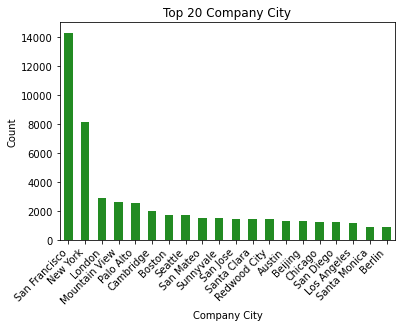

In [32]:
pd.value_counts(df['company_city']).head(20).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Company City")
plt.ylabel('Count')
plt.xlabel("Company City")

In [33]:
#investor_name
df['investor_name'].value_counts()

Sequoia Capital               776
Start-Up Chile                702
500 Startups                  694
Intel Capital                 674
Y Combinator                  625
                             ... 
Shohet & Cie                    1
Neyer Holdings Corporation      1
Mike Duda                       1
Responsible Technology          1
Asad Zafar                      1
Name: investor_name, Length: 22037, dtype: int64

In [34]:
df['investor_name'].value_counts(normalize = True)

Sequoia Capital               0.006781
Start-Up Chile                0.006134
500 Startups                  0.006064
Intel Capital                 0.005890
Y Combinator                  0.005461
                                ...   
Shohet & Cie                  0.000009
Neyer Holdings Corporation    0.000009
Mike Duda                     0.000009
Responsible Technology        0.000009
Asad Zafar                    0.000009
Name: investor_name, Length: 22037, dtype: float64

Text(0.5, 0, 'Investors name')

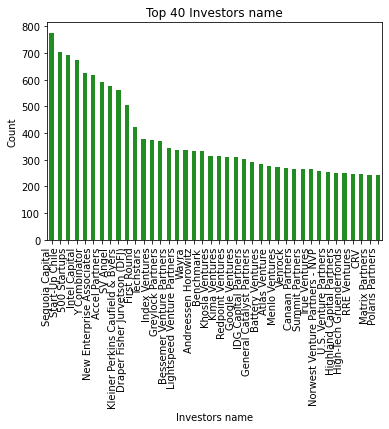

In [35]:
pd.value_counts(df['investor_name']).head(40).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=90, ha='right')
plt.title("Top 40 Investors name")
plt.ylabel('Count')
plt.xlabel("Investors name")

In [36]:
#investor_country_code
df['investor_country_code'].value_counts()

USA    60291
GBR     4803
DEU     2158
FRA     2005
CAN     1999
       ...  
GEO        1
TTO        1
AZE        1
MAR        1
IRN        1
Name: investor_country_code, Length: 85, dtype: int64

In [37]:
df['investor_country_code'].value_counts(normalize = True)

USA    0.696837
GBR    0.055513
DEU    0.024942
FRA    0.023174
CAN    0.023104
         ...   
GEO    0.000012
TTO    0.000012
AZE    0.000012
MAR    0.000012
IRN    0.000012
Name: investor_country_code, Length: 85, dtype: float64

Text(0.5, 0, 'Investors country')

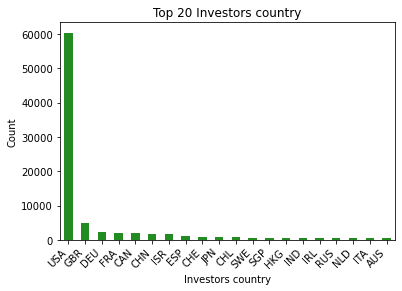

In [38]:
pd.value_counts(df['investor_country_code']).head(20).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Investors country")
plt.ylabel('Count')
plt.xlabel("Investors country")

In [39]:
#investor_city
df['investor_city'].value_counts()

Menlo Park       9962
New York         7030
San Francisco    5934
Palo Alto        5224
London           3146
                 ... 
Chappaqua           1
Christchurch        1
Newport Coast       1
Amesbury            1
Bridgewater         1
Name: investor_city, Length: 1381, dtype: int64

In [40]:
df['investor_city'].value_counts(normalize = True)

Menlo Park       0.115828
New York         0.081738
San Francisco    0.068994
Palo Alto        0.060739
London           0.036578
                   ...   
Chappaqua        0.000012
Christchurch     0.000012
Newport Coast    0.000012
Amesbury         0.000012
Bridgewater      0.000012
Name: investor_city, Length: 1381, dtype: float64

Text(0.5, 0, 'Investors city')

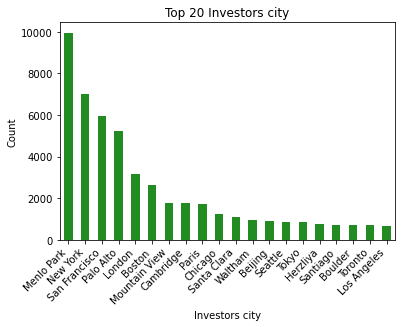

In [41]:
pd.value_counts(df['investor_city']).head(20).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Investors city")
plt.ylabel('Count')
plt.xlabel("Investors city")

In [42]:
#funding_round_type

In [43]:
df['funding_round_type'].value_counts()

venture                 70615
seed                    29272
angel                    4894
undisclosed              4479
private_equity           2128
debt_financing           1541
grant                     721
convertible_note          547
post_ipo_equity           126
equity_crowdfunding        80
secondary_market           53
post_ipo_debt              32
product_crowdfunding       18
Name: funding_round_type, dtype: int64

In [44]:
df['funding_round_type'].value_counts(normalize = True)

venture                 0.616693
seed                    0.255637
angel                   0.042740
undisclosed             0.039116
private_equity          0.018584
debt_financing          0.013458
grant                   0.006297
convertible_note        0.004777
post_ipo_equity         0.001100
equity_crowdfunding     0.000699
secondary_market        0.000463
post_ipo_debt           0.000279
product_crowdfunding    0.000157
Name: funding_round_type, dtype: float64

Text(0.5, 0, 'Founding Round Type')

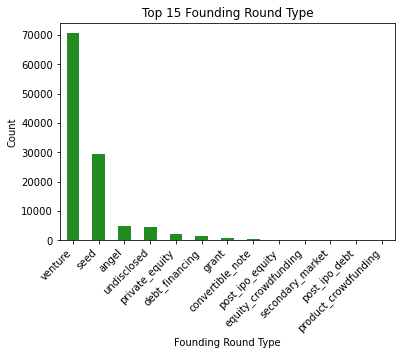

In [45]:
pd.value_counts(df['funding_round_type']).head(15).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title("Top 15 Founding Round Type")
plt.ylabel('Count')
plt.xlabel("Founding Round Type")

In [46]:
#funded_year
df['funded_year'].value_counts()

2013    21041
2014    20012
2012    16583
2011    13089
2010     9708
2008     7366
2009     7031
2007     6946
2006     5735
2005     4290
2004      707
2000      455
2003      374
2002      359
2001      309
1999      254
1998       65
1997       32
1996       30
1990       19
1995       17
1994       16
1993       15
1992       12
1991       10
1987        7
1985        5
1986        4
1982        3
1989        3
1984        2
1988        2
1979        2
1974        1
1921        1
1983        1
Name: funded_year, dtype: int64

In [47]:
df['funded_year'].value_counts(normalize = True)

2013    0.183755
2014    0.174768
2012    0.144822
2011    0.114308
2010    0.084782
2008    0.064329
2009    0.061403
2007    0.060661
2006    0.050085
2005    0.037465
2004    0.006174
2000    0.003974
2003    0.003266
2002    0.003135
2001    0.002699
1999    0.002218
1998    0.000568
1997    0.000279
1996    0.000262
1990    0.000166
1995    0.000148
1994    0.000140
1993    0.000131
1992    0.000105
1991    0.000087
1987    0.000061
1985    0.000044
1986    0.000035
1982    0.000026
1989    0.000026
1984    0.000017
1988    0.000017
1979    0.000017
1974    0.000009
1921    0.000009
1983    0.000009
Name: funded_year, dtype: float64

Text(0.5, 0, 'Found Year')

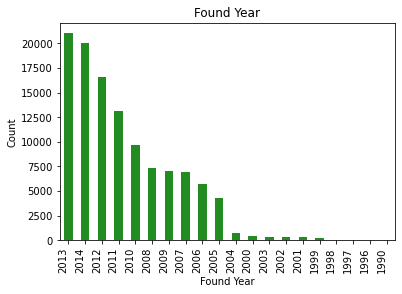

In [48]:
pd.value_counts(df['funded_year']).head(20).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=90, ha='right')
plt.title("Found Year")
plt.ylabel('Count')
plt.xlabel("Found Year")

### Group-level Aggregations

In [49]:
print("Funds raised depend on round type in millions of dollars \n\n " ,df.groupby('funding_round_type')[['raised_amount_usd']].agg(['mean','median','min','max']))

Funds raised depend on round type in millions of dollars 

                       raised_amount_usd                                  
                                  mean     median       min          max
funding_round_type                                                      
angel                         0.903536   0.500000  0.000000    63.590263
convertible_note              0.870053   0.640000  0.000000    10.000000
debt_financing               20.386740   4.000000  0.000000   750.000000
equity_crowdfunding           0.599269   0.160230  0.015826     7.000000
grant                         5.488604   0.202658  0.000000   750.000000
post_ipo_debt               373.919103  48.000000  3.500000  5800.000000
post_ipo_equity             293.248449  25.000000  0.000000  3200.000000
private_equity               69.849857  38.904959  0.000000  2600.000000
product_crowdfunding          1.241036   0.405329  0.132599     8.600000
secondary_market             21.142498   0.000000  0.000000   2

In [50]:
print("Funds raised depend on company market in millions of dollars \n\n " ,df.groupby('company_market')[['raised_amount_usd']].agg(['mean','median','min','max']))

Funds raised depend on company market in millions of dollars 

                 raised_amount_usd                             
                            mean    median    min         max
company_market                                               
3D                      5.035845  1.000000  0.000   20.000000
3D Printing             4.548769  1.000000  0.000   19.000000
3D Technology           2.271235  2.424402  0.000    6.390950
Accounting             10.811388  3.000000  0.000  100.000000
Ad Targeting            8.493224  3.500000  0.000   65.000000
...                          ...       ...    ...         ...
iOS                     3.192446  0.800000  0.000   40.000000
iPad                    1.589109  0.800000  0.000    7.000000
iPhone                  2.216571  1.000000  0.000   20.500000
iPod Touch              2.088429  2.500000  0.018    2.500000
mHealth                 0.094139  0.064021  0.000    0.276672

[712 rows x 4 columns]


In [51]:
print("Funds raised per year in millions of dollars \n\n" ,df.groupby('funded_year')[['raised_amount_usd']].agg(['mean','median','min','max']))

Funds raised per year in millions of dollars 

             raised_amount_usd                            
                         mean     median    min       max
funded_year                                              
1921                 0.001000   0.001000  0.001     0.001
1974                 0.000000   0.000000  0.000     0.000
1979                 1.000000   1.000000  1.000     1.000
1982                 0.348000   0.165000  0.155     0.724
1983                 0.094000   0.094000  0.094     0.094
1984                 0.000000   0.000000  0.000     0.000
1985                 0.215600   0.169000  0.000     0.666
1986                 0.000000   0.000000  0.000     0.000
1987                 0.425143   0.000000  0.000     2.500
1988                 0.000000   0.000000  0.000     0.000
1989                 0.000000   0.000000  0.000     0.000
1990                 6.468947   0.000000  0.000    17.550
1991                 0.000000   0.000000  0.000     0.000
1992                 0.2

### Distribution Visualization

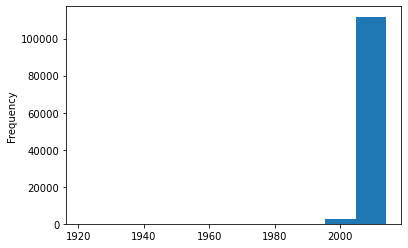

In [52]:
df['funded_year'].plot(kind = 'hist')

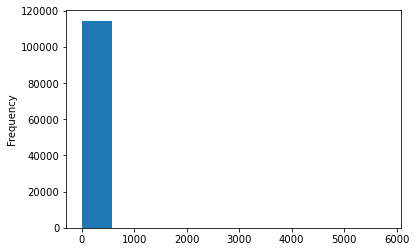

In [53]:
df['raised_amount_usd'].plot(kind = 'hist')

### Relationship Visualization

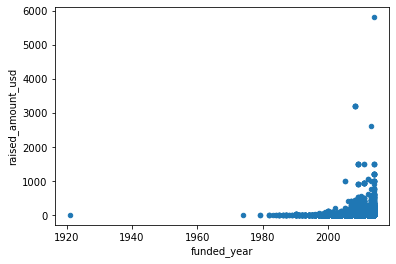

In [54]:
#relationship(correlation) between year and raised_amount
df.plot(kind = 'scatter', x = 'funded_year', y = 'raised_amount_usd')

In [55]:
# calculate Pearson's correlation
df.corr()

,funded_year,raised_amount_usd
funded_year,1.0000,-0.0065
raised_amount_usd,-0.0065,1.0000


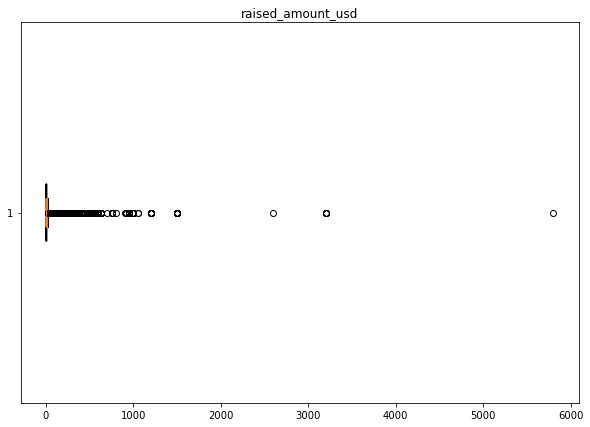

In [56]:
# bix plot for raised_amount_usd

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(df['raised_amount_usd'], patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#0000FF']
plt.title("raised_amount_usd")
plt.show()